# 1.  Business Understanding

**Introduction**

Sepsis is a severe and potentially life-threatening medical condition that occurs when the body's response to an infection becomes dysregulated, leading to widespread inflammation and organ dysfunction. Recognized as a medical emergency, sepsis demands immediate attention and intervention. Timely detection is critical for effective treatment and improved patient outcomes.

**Objective**

The primary objective of this project is to develop a machine learning model capable of predicting the likelihood of sepsis. Additionally, the aim is to integrate this predictive model into a FastAPI application, creating a user-friendly and efficient tool for healthcare professionals. The goal is to empower medical practitioners with a reliable system for sepsis detection, facilitating timely interventions and ultimately enhancing patient care and outcomes.

**Dataset features**

**ID:** number to represent patient ID

**PRG:** Plasma glucose

**PL:** Blood Work Result-1 (mu U/ml)

**PR:** Blood Pressure (mm Hg)

**SK:** Blood Work Result-2 (mm)

**TS:** Blood Work Result-3 (mu U/ml)

**M11:** Body mass index (weight in kg/(height in m)^2

**BD2:** Blood Work Result-4 (mu U/ml)

**Age:** patients age (years)

**Insurance:** If a patient holds a valid insurance card

**Sepsis:** Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

**Hypothesis**

**Null hypothesis:** The variables Age, Plasma Glucose (PRG), and Body Mass Index (M11) do not have a statistically significant impact on the likelihood of Sepsis 

**Alternate hypothesis:** The variables Age, Plasma Glucose (PRG), and Body Mass Index (M11) have a statistically significant impact on the likelihood of Sepsis

**Analytical questions**
1.	What is the distribution of plasma glucose levels in the dataset?
2.	Is there a significant difference in plasma glucose levels between patients who develop sepsis and those who do not?
3.	What is the average BMI among patients who develop sepsis?
4.	Is there a difference in body mass index (BMI) between patients with and without sepsis?
5.	Is there a specific age range where the likelihood of sepsis is higher?
6.	Is the impact of insurance status on sepsis likelihood consistent across different age groups?



# 2. Data Understanding

In [1]:
# Importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
import joblib


from scipy.stats import mannwhitneyu
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, fbeta_score
from sklearn.utils.class_weight import compute_class_weight
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



In [2]:
# Read the test dataset
test_data = pd.read_csv(r'C:\Users\User\Desktop\AZUBI\Sepsis-Prediction-Model-LP6\datasets\Paitients_Files_Test.csv')


In [3]:
test_data.head(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [4]:
# Read the train dataset
train_data = pd.read_csv(r'C:\Users\User\Desktop\AZUBI\Sepsis-Prediction-Model-LP6\datasets\Paitients_Files_Train.csv')

In [5]:
train_data.head(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [73]:
# Shape of Datasets
train_data.shape

(599, 11)

In [74]:
test_data.shape

(169, 10)

The shape of training dataset is (599, 11), indicating that there are 599 rows and 11 columns in  dataset. 
The shape of testing dataset is (169, 10), indicating that there are 169 rows and 10 columns in  dataset.

## Exploratory Data Analysis (EDA)

In [75]:
# Information on train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


The ID and Sepsis columns are Objects (Strings), PRG, PL, PR, SK, TS, Age are integers and   M11 and BD2 are floating numbers(Float64).

All columns have 599 non-null entries, indicating there are no missing values in the dataset

In [7]:
# Check unique values in the 'Sepsis' column
train_data['Sepssis'].unique().sum()

'PositiveNegative'

The sepsis column has two unique categories which are the positive instances and the negative instances.

In [8]:
# Check for duplicate rows
train_data.duplicated().sum()

0

There are no duplicate rows in the train dataset. 

In [9]:
# Information on test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


The shape of the dataset is (169,10) meaning 169 rows and 10 columns. 

The ID column is Objects (Strings), PRG, PL, PR, SK, TS, Age are integers and M11 and BD2 are floating numbers(Float64).

All columns have 619 non-null entries, indicating there are no missing values in the test dataset

In [10]:
# Check for duplicate rows
test_data.duplicated().sum()

0

There are no duplicate rows in the test dataset. 

### Descriptive statistics of features

In [11]:
# Descriptives
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


These descriptive statistics give insights into the central tendencies and ranges of each numeric variable in the train dataset.

- The mean plasma glucose (PRG) level is approximately 3.82, with levels ranging from 0 to 17.
- The mean blood work result-1 (PL) value is around 120.15, varying from 0 to 198.
- The mean blood pressure (PR) is approximately 68.73, with values ranging from 0 to 122.
- The mean blood work result-2 (SK) value is about 20.56, ranging from 0 to 99.
- The mean blood work result-3 (TS) value is roughly 79.46, ranging from 0 to 846.
- The mean body mass index (M11) is around 31.92, with BMI values ranging from 0 to 67.10.
- The mean blood work result-4 (BD2) value is approximately 0.48, with values ranging from 0.078 to 2.42.
- The mean age is approximately 33.29, with ages ranging from 21 to 81.
- The mean insurance status is about 0.69, and insurance status is binary (0 or 1).

### Univariate Analysis

The distribution of the target column 'Sepssis'

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64


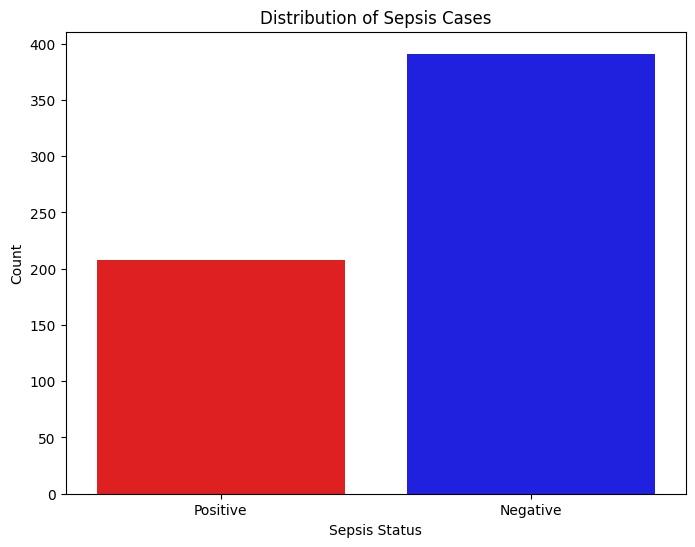

In [12]:
# Check the counts of each class in the target variable 'Sepssis'
class_counts = train_data['Sepssis'].value_counts()
print(class_counts)

# Visualize the distribution of the target column 'Sepssis'
plt.figure(figsize=(8, 6))
sns.countplot(x='Sepssis', data=train_data, palette={'Positive': 'red', 'Negative': 'blue'})
plt.title('Distribution of Sepsis Cases')
plt.xlabel('Sepsis Status')
plt.ylabel('Count')
plt.show()


The graph indicates a higher count of negative cases (blue) compared to positive cases (red) in 'Sepsis'. The class distribution is imbalanced. 

Histograms for numeric features

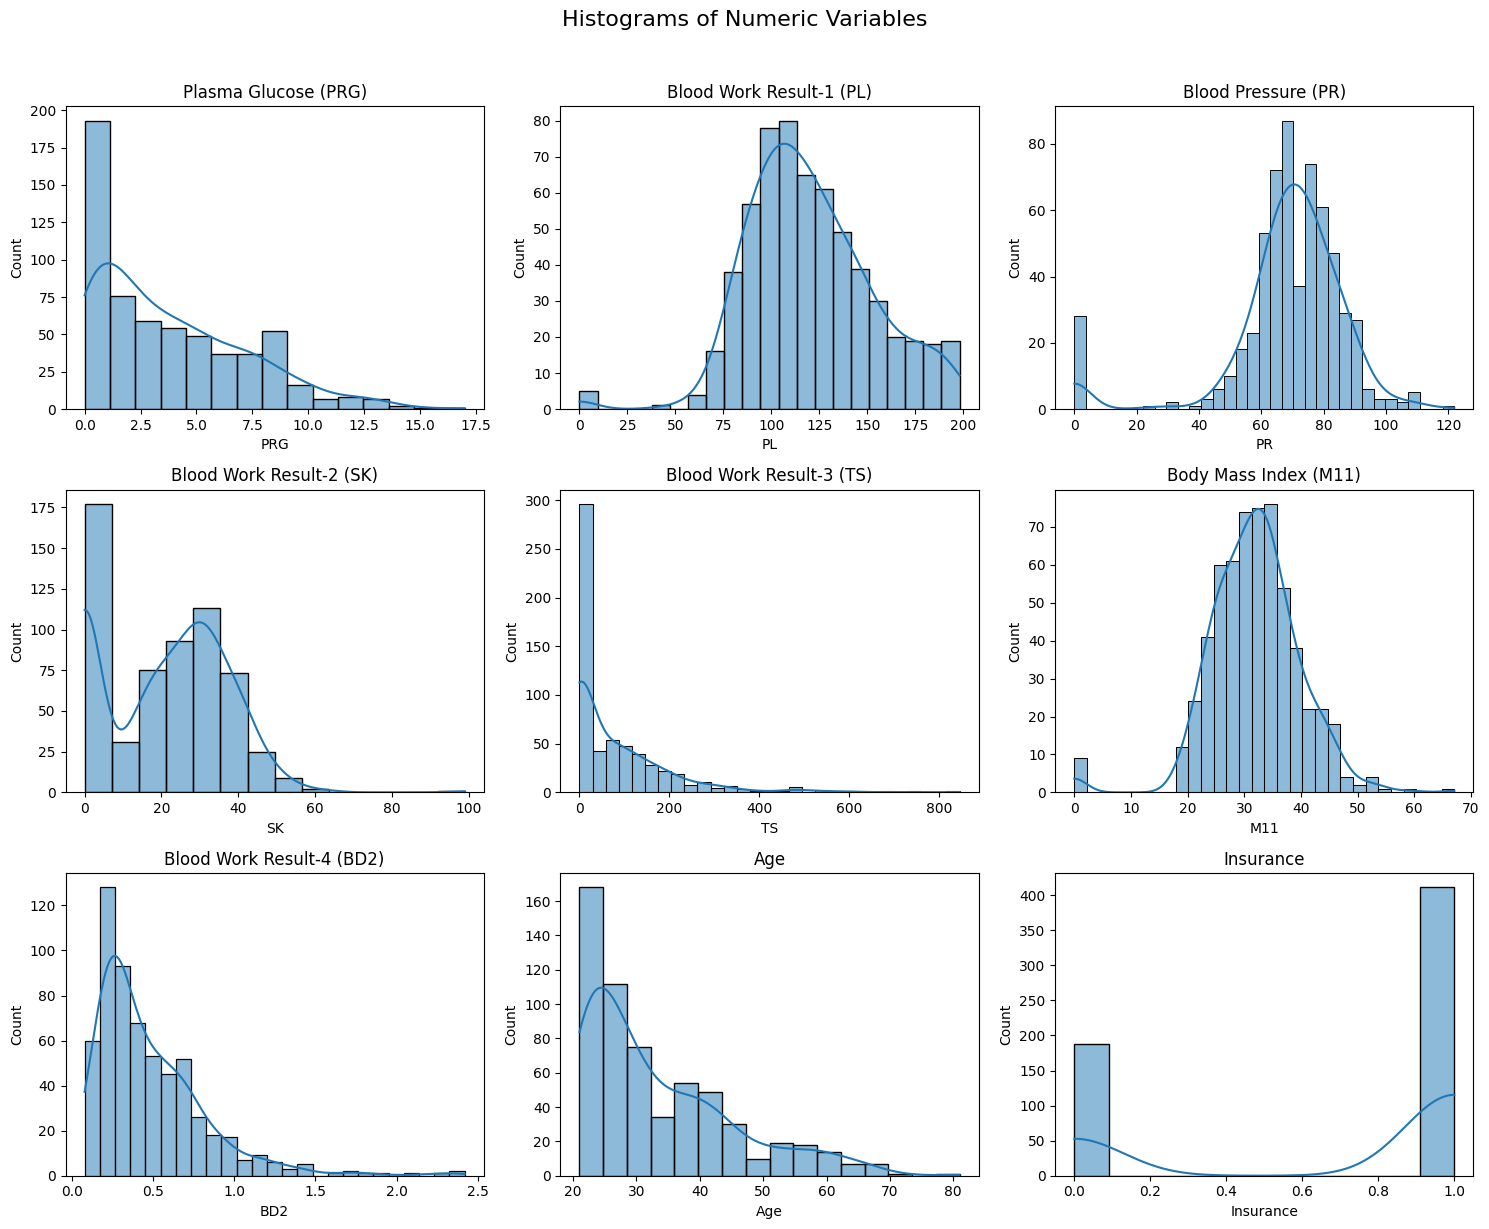

In [13]:
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Histograms of Numeric Variables', y=1.02, fontsize=16)

# Plot histograms for each numeric variable using Seaborn
sns.histplot(train_data['PRG'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Plasma Glucose (PRG)')

sns.histplot(train_data['PL'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Blood Work Result-1 (PL)')

sns.histplot(train_data['PR'], ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Blood Pressure (PR)')

sns.histplot(train_data['SK'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Blood Work Result-2 (SK)')

sns.histplot(train_data['TS'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Blood Work Result-3 (TS)')

sns.histplot(train_data['M11'], ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Body Mass Index (M11)')

sns.histplot(train_data['BD2'], ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Blood Work Result-4 (BD2)')

sns.histplot(train_data['Age'], ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Age')

sns.histplot(train_data['Insurance'], ax=axes[2, 2], kde=True)
axes[2, 2].set_title('Insurance')

# Adjust layout
plt.tight_layout()
plt.show()


**Plasma Glucose (PRG):** The distribution appears somewhat right-skewed.
**Blood Work Result-1 (PL):** The distribution seems to be approximately symmetric.

**Blood Pressure (PR):** The distribution appears approximately symmetric. 

**Blood Work Result-2 (SK):** The distribution appears somewhat left-skewed.

**Blood Work Result-3 (TS):** The distribution appears highly right-skewed.

**Body Mass Index (M11):** The distribution appears approximately symmetric.

**Blood Work Result-4 (BD2):** The distribution appears somewhat right-skewed.

**Age:** The distribution appears somewhat right-skewed.

**Insurance:** The distribution is binary and not continuous.

Based on the mean, median, and visual inspection, features like 'PL' (Blood Work Result-1) and 'PR' (Blood Pressure) appear to have distributions that are closer to normal, with symmetric shapes. Other features exhibit skewness to varying degrees.

### Checking outliers

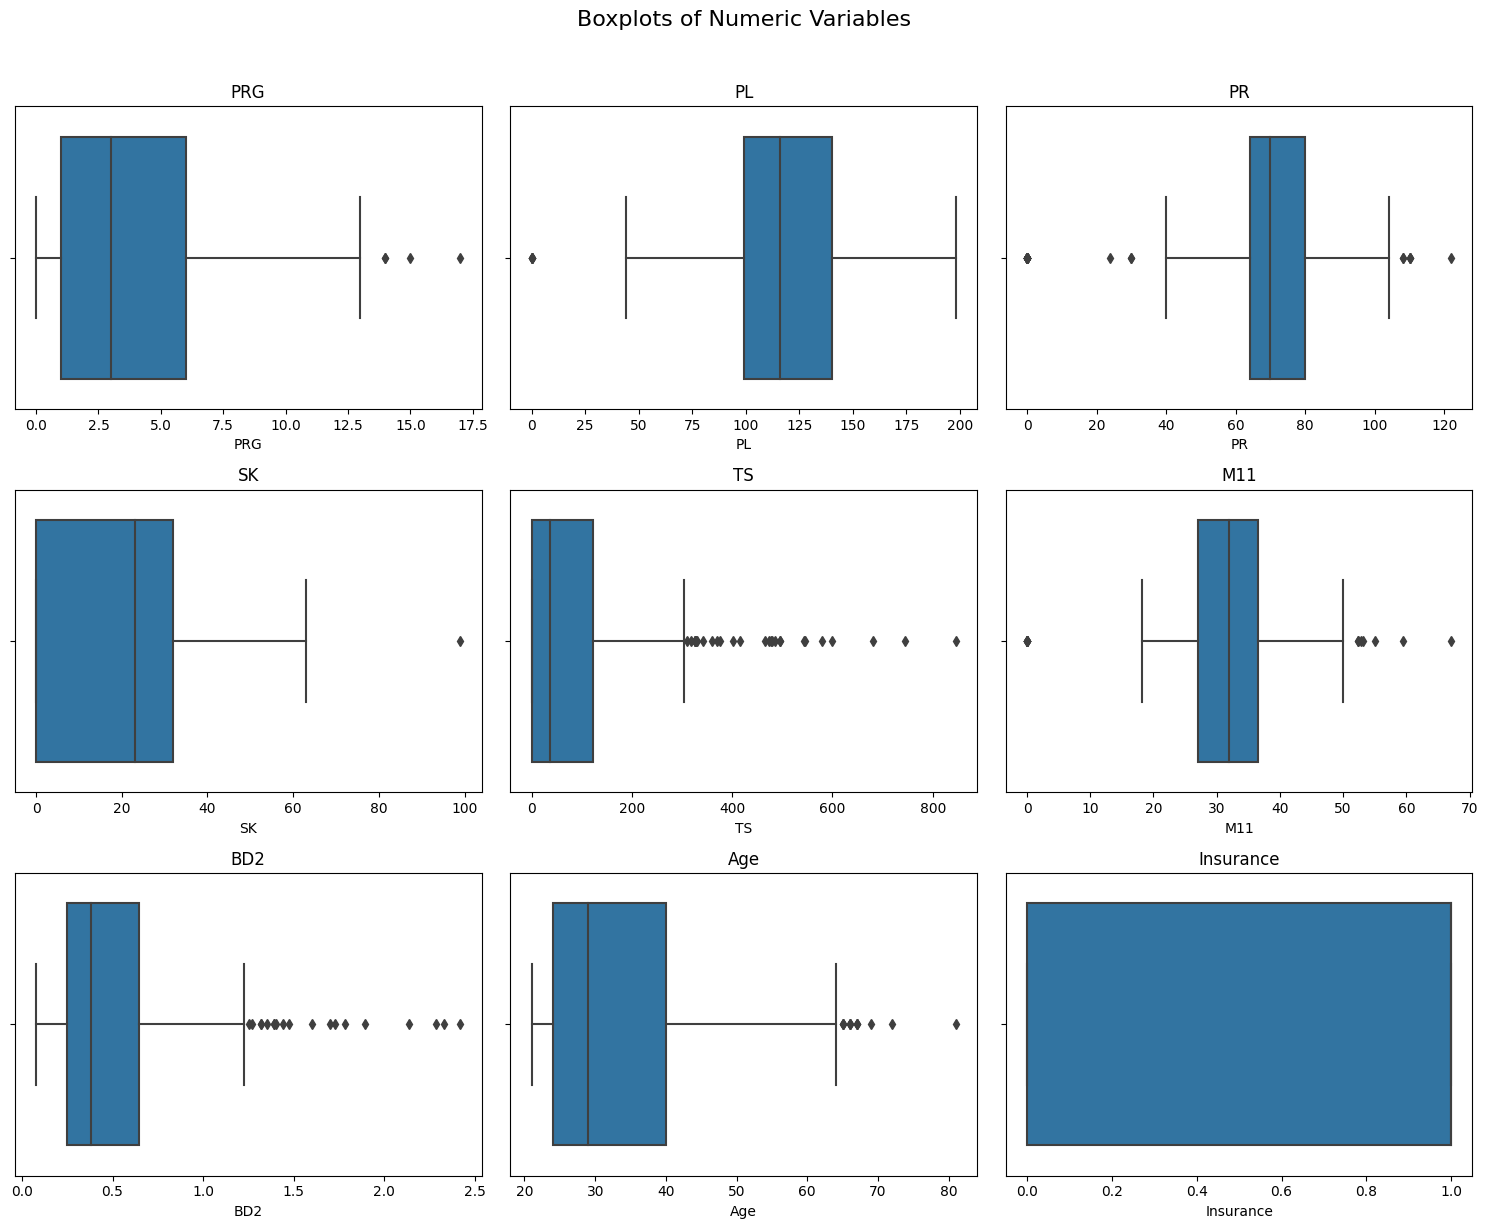

In [14]:
# Identifying outliers using Boxplots

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Boxplots of Numeric Variables', y=1.02, fontsize=16)

# Plot boxplots for each numeric variable using Seaborn
numeric_features = train_data.select_dtypes(include=['float64', 'int64']).columns
for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    
    # Plot boxplot
    sns.boxplot(x=train_data[feature], ax=ax)
    ax.set_title(f'{feature}')

# Adjust layout
plt.tight_layout()
plt.show()


### Bivariate Analysis

Correlation of numeric features

The correlation matrix provides insights into the relationships between pairs of numeric variables in the training dataset. 

In [15]:
# Exclude 'ID' and 'Sepssis' columns
columns_to_exclude = ['ID', 'Sepssis']
numeric_columns = train_data.drop(columns=columns_to_exclude).select_dtypes(include=['number'])

# Calculate correlation matrix
correlation = numeric_columns.corr()
correlation


,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


Correlation Heatmap of numeric features

The heatmap aids to visually represent the correlation matrix of numeric variables in the training dataset. 

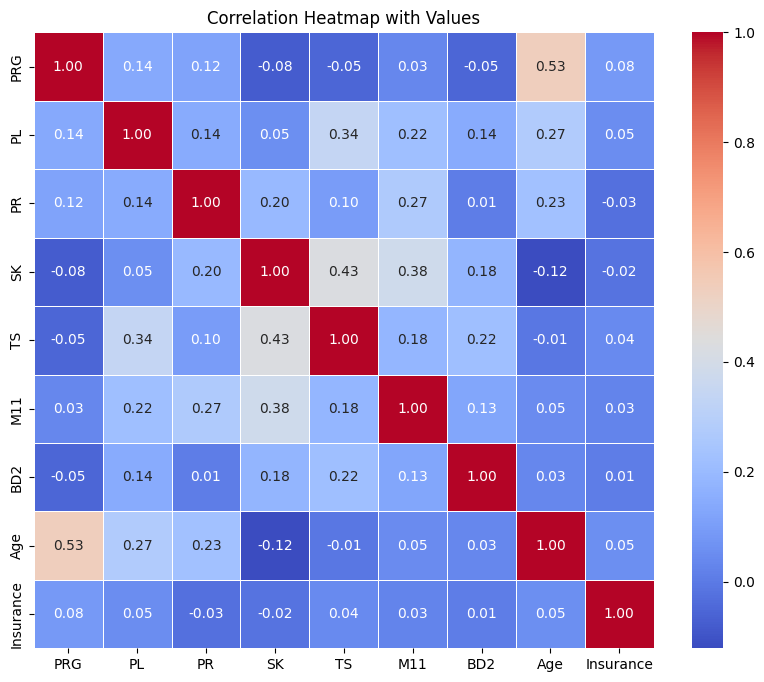

In [16]:
# Exclude 'ID' and 'Sepssis' columns
columns_to_exclude = ['ID', 'Sepssis']
numeric_columns = train_data.drop(columns=columns_to_exclude).select_dtypes(include=['number'])

# Calculate correlation matrix
correlation = numeric_columns.corr()

# Visualize the correlation matrix as a heatmap with values displayed
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title and display the plot
plt.title('Correlation Heatmap with Values')
plt.show()


### Multivariate Analysis

In [17]:
# Create a copy of the train_data DataFrame
train_data_copy = train_data.copy()


### Hypothesis Testing using Logistic Regression

**Logistic regression** is a type of multiple regression used for predicting binary outcomes, and it is a suitable approach for analyzing the impact of multiple predictor variables (independent variables) on a binary categorical target variable (dependent variable).

**Null hypothesis:** The variables Age, Plasma Glucose (PRG) and Body Mass Index (M11) do not have a statistically significant impact on the likelihood of Sepsis 

**Alternate hypothesis:** The variables Age, Plasma Glucose (PRG) and Body Mass Index (M11) have a statistically significant impact on the likelihood of Sepsis

In [18]:
# Define features and target variable, excluding 'SK'
X = train_data_copy[['Age', 'PRG', 'M11']]
y = train_data_copy['Sepssis']

# Convert the target variable to binary numeric values (0 and 1)
y = pd.get_dummies(y, drop_first=True)['Positive']

# Add an intercept
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Display the updated model summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.547676
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Positive   No. Observations:                  479
Model:                          Logit   Df Residuals:                      475
Method:                           MLE   Df Model:                            3
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.1495
Time:                        06:14:25   Log-Likelihood:                -262.34
converged:                       True   LL-Null:                       -308.45
Covariance Type:            nonrobust   LLR p-value:                 7.251e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9038      0.685     -8.619      0.000      -7.246      -4.561
Age            0.0302      0.

Likelihood Ratio Test (LLR) p-value: The LLR p-value is very low which is approximately 0.000, suggesting that at least one of the predictor variables is significantly related to the outcome variable (Sepsis).

The Pseudo R-squared is approximately 0.1495, which means that the model explains about 14.95% of the variance in the dependent variable (likelihood of Sepsis) based on the included independent variables (Age, Plasma Glucose and Body Mass Index).

The logistic regression model shows that the p-values for Age, Plasma Glucose (PRG), and Body Mass Index (M11) are less than the alpha value(0.01). This implies that they are statistically significant predictors of the likelihood of Sepsis.

Based on the results, we reject the null hypothesis and conclude that Age, Plasma Glucose (PRG) and Body Mass Index (M11) have a statistically significant impact on the likelihood of Sepsis.

1.  What is the distribution of plasma glucose levels in the dataset?

PRG
1     100
0      93
2      76
3      59
4      54
5      49
7      37
6      37
8      32
9      20
10     16
12      8
11      7
13      7
14      2
15      1
17      1
Name: count, dtype: int64


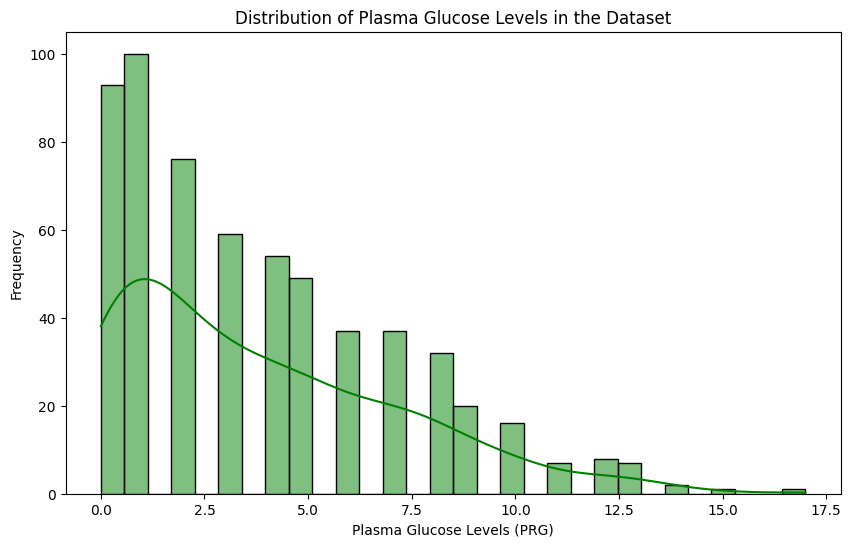

In [19]:
# DataFrame
plasma_glucose_counts = train_data_copy['PRG'].value_counts()

# Print the values and their respective frequencies
print(plasma_glucose_counts)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(train_data_copy['PRG'], kde=True, bins=30, color='green')
plt.title('Distribution of Plasma Glucose Levels in the Dataset')
plt.xlabel('Plasma Glucose Levels (PRG)')
plt.ylabel('Frequency')
plt.show()


The plot shows how the values are distributed and the relative frequency of each PRG level. 
The distribution of PRG levels in the dataset is right-skewed, with a higher frequency of lower values (towards the left side of the histogram).
The majority of patients seem to have PRG values around 0, 1, and 2, as these values have higher counts.

2. Is there a significant difference in plasma glucose levels between patients who develop sepsis and those who do not?

The **Mann-Whitney U test**, also known as the Wilcoxon rank-sum test, is a non-parametric statistical test used to assess whether there is a difference between two independent groups. It's particularly useful when the data is not normally distributed or when the assumption of homogeneity of variances is violated.

In [20]:
sepsis_positive = train_data_copy[train_data_copy['Sepssis'] == 'Positive']['PRG']
sepsis_negative = train_data_copy[train_data_copy['Sepssis'] == 'Negative']['PRG']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(sepsis_positive, sepsis_negative)

# Format the p-value as a regular decimal
formatted_p_value = "{:.5f}".format(p_value)

# Print the results
print(f"Mann-Whitney U test statistic: {statistic}")
print(f"P-value: {formatted_p_value}")

# Check for statistical significance
alpha = 0.01
if p_value < alpha:
    print("There is a significant difference in plasma glucose levels between patients with and without sepsis.")
else:
    print("There is no significant difference in plasma glucose levels between patients with and without sepsis.")



Mann-Whitney U test statistic: 49635.0
P-value: 0.00001
There is a significant difference in plasma glucose levels between patients with and without sepsis.


This suggests that there is evidence supporting the idea that plasma glucose levels differ between patients who develop sepsis and those who do not. 

3.  What is the average BMI among patients who develop sepsis?

In [21]:
# DataFrame
average_bmi_sepsis = train_data_copy[train_data_copy['Sepssis'] == 'Positive']['M11'].mean()

print(f"The average BMI among patients who develop sepsis is: {average_bmi_sepsis:.2f}")


The average BMI among patients who develop sepsis is: 35.39


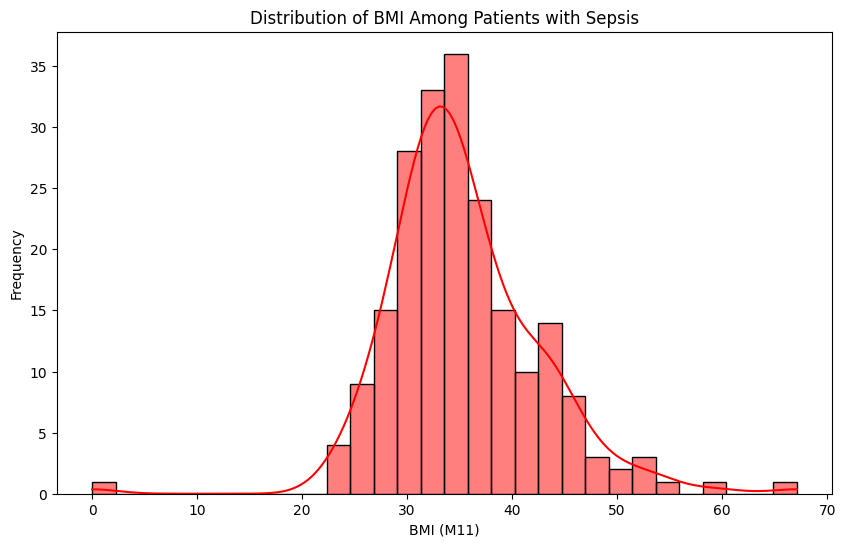

In [22]:
plt.figure(figsize=(10, 6))

# Create a histogram for BMI among patients with sepsis
sns.histplot(train_data_copy[train_data_copy['Sepssis'] == 'Positive']['M11'], kde=True, bins=30, color='red')

# Set plot labels and title
plt.title('Distribution of BMI Among Patients with Sepsis')
plt.xlabel('BMI (M11)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


The average BMI of 35.39 suggests the typical BMI among patients who develop sepsis. The symmetric shape suggests that, on average, BMI values are evenly distributed around the central tendency. 

4.  Is there a difference in body mass index (BMI) between patients with and without sepsis?

In [23]:
sepsis_positive_bmi = train_data_copy[train_data_copy['Sepssis'] == 'Positive']['M11']
sepsis_negative_bmi = train_data_copy[train_data_copy['Sepssis'] == 'Negative']['M11']

# Perform the Mann-Whitney U test
statistic_bmi, p_value_bmi = mannwhitneyu(sepsis_positive_bmi, sepsis_negative_bmi)

# Print the results
print(f"Mann-Whitney U test statistic for BMI: {statistic_bmi}")
print(f"P-value for BMI: {p_value_bmi:.5f}")

# Check for statistical significance
alpha = 0.01
if p_value_bmi < alpha:
    print("There is a significant difference in body mass index (BMI) between patients with and without sepsis.")
else:
    print("There is no significant difference in body mass index (BMI) between patients with and without sepsis.")


Mann-Whitney U test statistic for BMI: 56864.0
P-value for BMI: 0.00000
There is a significant difference in body mass index (BMI) between patients with and without sepsis.


This suggests that there is evidence supporting the idea that BMI values differ between patients who develop sepsis and those who do not.

5. Is there a specific age range where the likelihood of sepsis is higher?

Sepssis      Negative   Positive
Age Group                       
20-29       77.524430  22.475570
30-39       55.147059  44.852941
40-49       45.882353  54.117647
50-59       43.181818  56.818182
60-69       72.000000  28.000000
70-79      100.000000   0.000000
80-89      100.000000   0.000000
90-100       0.000000   0.000000


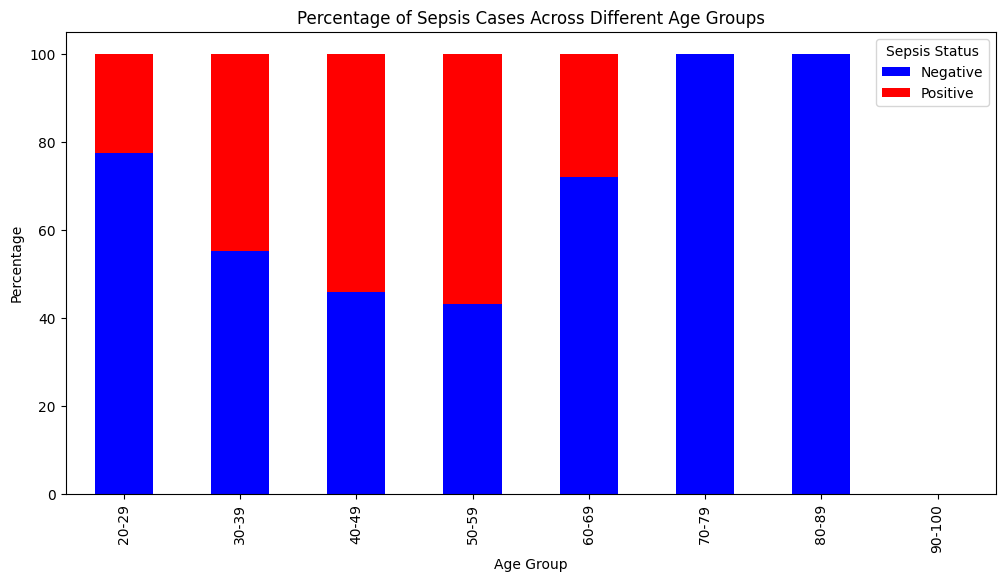

In [24]:
# Create age groups (e.g., bins of 10 years)
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Add 'Age Group' column to the DataFrame
train_data_copy['Age Group'] = pd.cut(train_data_copy['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the percentage of patients with sepsis in each age group
sepsis_percentage_by_age = (
    train_data_copy.groupby('Age Group')['Sepssis']
    .value_counts(normalize=True)
    .mul(100)
    .unstack()
    .fillna(0)
)

# Print the calculated percentages
print(sepsis_percentage_by_age)

# Plot the percentages
sepsis_percentage_by_age.plot(kind='bar', stacked=True, color=['blue', 'red'], figsize=(12, 6))
plt.title('Percentage of Sepsis Cases Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Sepsis Status')
plt.show()


Each row in the table corresponds to an age group, and the columns indicate the percentage of patients with and without sepsis in each group.
In age groups 20-29, 30-39, 40-49, and 50-59, the percentage of patients with sepsis is higher than in the older age groups.
Notably, in the 70-79 and 80-89 age groups, there are no patients with sepsis based on the dataset.

6.  Is the impact of insurance status on sepsis likelihood consistent across different age groups?

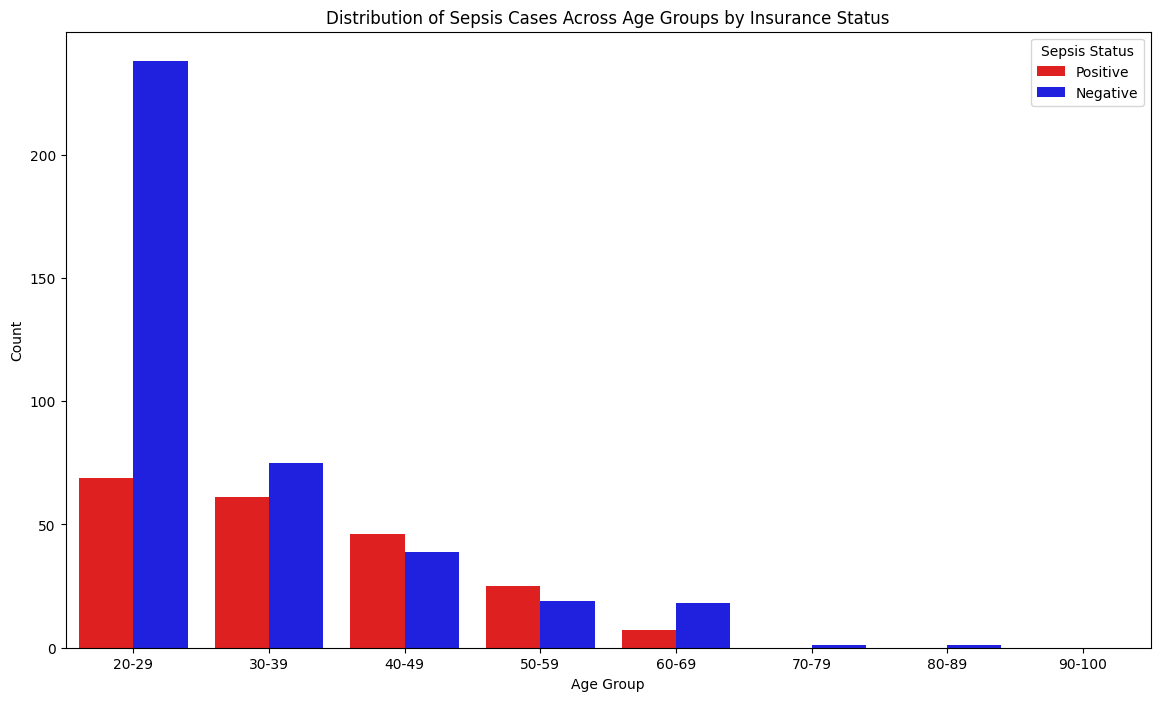

In [25]:
plt.figure(figsize=(14, 8))

# Create a stacked bar chart for sepsis cases, considering age group and insurance status
sns.countplot(x='Age Group', hue='Sepssis', data=train_data_copy, palette={'Positive': 'red', 'Negative': 'blue'}, hue_order=['Positive', 'Negative'], dodge=True)
plt.title('Distribution of Sepsis Cases Across Age Groups by Insurance Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sepsis Status', loc='upper right')

# Show the plot
plt.show()


 In the 20-29, 30-39 and 60-69 age groups, the proportion of sepsis cases appears higher among patients without insurance compared to those with insurance.
 In the age groups 40-49 and 50-59, the proportion of sepsis cases appears higher among patients with insurance compared to those without insurance.

## Feature Selection
The best features will be selected for our algorithm.We will use phi-k correlation which is an extension of phi correlation. It returns a matrix of correlation values between the categorical variables. The higher the value, the stronger the association between the variables.

In [26]:
train_data_copy.dtypes

ID             object
PRG             int64
PL              int64
PR              int64
SK              int64
TS              int64
M11           float64
BD2           float64
Age             int64
Insurance       int64
Sepssis        object
Age Group    category
dtype: object

In [27]:
# Convert 'Sepssis' to numeric values
train_data_copy['Sepssis'] = train_data_copy['Sepssis'].map({'Positive': 1, 'Negative': 0})


In [28]:
# DataFrame with numeric features and the target variable
# Drop any non-numeric columns if needed
numeric_data = train_data_copy.select_dtypes(include='number')

# Calculate Pearson correlation between each numeric feature and the target variable
correlations = numeric_data.corrwith(train_data_copy['Sepssis'])

# Sort correlation values in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Display all correlation values in descending order
print("Correlation Values (Descending Order):")
print(sorted_correlations)

# Set a threshold for feature selection
threshold = 0.0  # You can adjust this threshold based on your preference

# Select features with correlation above the threshold
selected_features = sorted_correlations[abs(sorted_correlations) > threshold].index.tolist()

# Display selected features
print("\nSelected Features:")
print(selected_features)


Correlation Values (Descending Order):
Sepssis      1.000000
PL           0.449719
M11          0.315894
Age          0.210234
PRG          0.207115
BD2          0.181561
TS           0.145892
SK           0.075585
Insurance    0.062582
PR           0.061086
dtype: float64

Selected Features:
['Sepssis', 'PL', 'M11', 'Age', 'PRG', 'BD2', 'TS', 'SK', 'Insurance', 'PR']


For feature selection, features with correlations above the threshold 0.0 are chosen. The selected features are 'PL', 'M11', 'Age', 'PRG', 'BD2', 'TS', 'SK', 'Insurance', 'PR'.

These features are considered relevant as they have correlations above the specified threshold and can potentially contribute to predicting the likelihood of sepsis.

Drop Irrelevant Columns

In [29]:
# Drop specific columns
columns_to_drop = ['ID']
train_data_final = train_data.drop(columns=columns_to_drop)

# Display the updated DataFrame
train_data_final.head()


,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


# Modeling

Split Dataset into X and y

In [30]:
X = train_data_final.drop(columns=['Sepssis'])  # Features (all columns except 'Sepssis')
y = train_data_final['Sepssis']  # Target variable

In [31]:
X.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
X.shape

(599, 9)

In [33]:
y.head()

0    Positive
1    Negative
2    Positive
3    Negative
4    Positive
Name: Sepssis, dtype: object

In [34]:
type(y)

pandas.core.series.Series

In [35]:

X.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

In [36]:
X.dtypes

PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
dtype: object

In [37]:
# Specify the numeric features for scaling
input_features = X.columns

In [38]:
input_features

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

Create Piplines

In [39]:
# Specify the transformation functions
preprocessor = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), input_features),
    ('log transformation', FunctionTransformer(np.log1p), input_features),
], remainder='passthrough')  # Include non-numeric features as they are

This preprocessor will be used in a pipeline to preprocess the data before feeding it into a model. 

**Training Models**

1. Train Model 1 - K-Nearest Neighbour (Distance model)

In [40]:
neighbors = KNeighborsClassifier()
pipeline = Pipeline(steps=
                    [('preprocessor',preprocessor),
                     ('neighbors',neighbors),
])

In [41]:
# Split the data into training and testing sets, with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (479, 9)
X_test shape: (120, 9)
y_train shape: (479,)
y_test shape: (120,)


In [42]:
# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_encoded)

# Make predictions on the test data
knn_pred = pipeline.predict(X_test)

In [43]:
# Print the classification report
print(classification_report(y_test_encoded, knn_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78        78
           1       0.59      0.57      0.58        42

    accuracy                           0.71       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.71      0.71      0.71       120



The model achieved an overall accuracy of 71% on the test set. Precision for class 0 (Negative) is 77%, and recall is 78%. Precision for class 1 (Positive) is 59%, and recall is 57%. The F1-score, which balances precision and recall, is 0.78 for class 0 and 0.58 for class 1.

2. Train Model 2 - Logistic Regression (Gradient Descent)

In [44]:
# Define the logistic regression model with gradient descent
logistic_regression = LogisticRegression(solver='sag', max_iter=1000)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic_regression', logistic_regression),
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('logistic_regression',
                 LogisticRegression(max_iter=1000, solver='sag'))])

In [45]:
# Make predictions on the test data
logistic_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test_encoded, logistic_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        78
           1       0.64      0.64      0.64        42

    accuracy                           0.75       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.75      0.75      0.75       120



The model achieved an overall accuracy of 75% on the test set. Precision for class 0 (Negative) is 81%, and recall is 81%. Precision for class 1 (Positive) is 64%, and recall is 64%. The F1-score, which balances precision and recall, is 0.81 for class 0 and 0.64 for class 1.

The Logistic Regression model demonstrates improved performance compared to the K-Nearest Neighbors model.

3. Train Model 3 - Decision Tree (Decision Tree)

In [46]:
# Define the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('decision_tree', decision_tree),
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('decision_tree', DecisionTreeClassifier(random_state=42))])

In [47]:
# Make predictions on the test data
dt_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test_encoded, dt_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        78
           1       0.63      0.57      0.60        42

    accuracy                           0.73       120
   macro avg       0.71      0.70      0.70       120
weighted avg       0.73      0.73      0.73       120



The model achieved an overall accuracy of 73% on the test set. Precision for class 0 (Negative) is 78%, and recall is 82%. Precision for class 1 (Positive) is 63%, and recall is 57%. The F1-score, which balances precision and recall, is 0.80 for class 0 and 0.60 for class 1.

The Decision Tree model exhibits reasonable performance with an accuracy of 73%.


4. Train Model 4 - Random Forest 

In [48]:
# Create the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', random_forest),
])

# Fit the pipeline on the training data
pipeline_rf.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('random_forest', RandomForestClassifier(random_state=42))])

In [49]:
# Make predictions on the test data
rf_pred = pipeline_rf.predict(X_test)

# Print the classification report
print("Random Forest Classification Report:")
print(classification_report(y_test_encoded, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        78
           1       0.60      0.60      0.60        42

    accuracy                           0.72       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.72      0.72      0.72       120



The model achieved an overall accuracy of 72% on the test set. Precision for class 0 (Negative) is 78%, and recall is 78%. Precision for class 1 (Positive) is 60%, and recall is 60%. The F1-score, which balances precision and recall, is 0.78 for class 0 and 0.60 for class 1.

The Random Forest model exhibits reasonable performance with an accuracy of 72%.

5. Train Model 5 - XGBoost (Extreme Gradient Boosting) 

In [50]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Create the pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb_classifier', xgb_classifier),
])

# Fit the pipeline on the training data
pipeline_xgb.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('xgb_cl...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [51]:
# Make predictions on the test data
xgb_pred = pipeline_xgb.predict(X_test)

# Print the classification report
print("XGBoost Classification Report:")
print(classification_report(y_test_encoded, xgb_pred))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        78
           1       0.55      0.52      0.54        42

    accuracy                           0.68       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.68      0.68      0.68       120



The model achieved an overall accuracy of 68% on the test set. Precision for class 0 (Negative) is 75%, and recall is 77%. Precision for class 1 (Positive) is 55%, and recall is 52%. The F1-score, which balances precision and recall, is 0.76 for class 0 and 0.54 for class 1.

The XGBoost model demonstrates fair performance with an accuracy of 68%.


6 .Train Model 6 - Gaussian Naive Bayes

In [52]:
# Create the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Create the pipeline
pipeline_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('naive_bayes_classifier', naive_bayes_classifier),
])

# Fit the pipeline on the training data
pipeline_nb.fit(X_train, y_train_encoded)

# Make predictions on the test data
nb_pred = pipeline_nb.predict(X_test)

# Print the classification report
print("Naive Bayes Classification Report:")
print(classification_report(y_test_encoded, nb_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        78
           1       0.55      0.62      0.58        42

    accuracy                           0.69       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.70      0.69      0.70       120



The model achieved an overall accuracy of 69% on the test set. Precision for class 0 (Negative) is 78%, and recall is 73%. Precision for class 1 (Positive) is 55%, and recall is 62%. The F1-score, which balances precision and recall, is 0.75 for class 0 and 0.58 for class 1.

The Gaussian Naive Bayes model demonstrates moderate performance with an accuracy of 69%.


7. Train Model 7 - neural network(TensorFlow and Keras)

In [53]:
# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
_, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Accuracy on the test set: {accuracy:.2f}")

# Make predictions on the test data
nn_pred_proba = model.predict(X_test)
nn_pred = (nn_pred_proba > 0.5).astype(int).flatten()

# Decode predictions if needed
nn_pred = label_encoder.inverse_transform(nn_pred)

# Print the classification report
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_pred))




Epoch 1/10




12/12 [==============================] - 2s 24ms/step - loss: 1.3661 - accuracy: 0.6554 - val_loss: 1.2067 - val_accuracy: 0.6667
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 0.8576 - accuracy: 0.6893 - val_loss: 0.8625 - val_accuracy: 0.6458
Epoch 3/10
12/12 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.7050 - val_loss: 0.7712 - val_accuracy: 0.6562
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.7023 - val_loss: 0.8104 - val_accuracy: 0.6562
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 0.6394 - accuracy: 0.6919 - val_loss: 0.7328 - val_accuracy: 0.6771
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.7154 - val_loss: 0.7480 - val_accuracy: 0.6771
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 0.5635 - accuracy: 0.7520 - val_loss: 0.7484 - val_accuracy: 0.6354
Epoch 8/10
12/12 [===========

The neural network achieved an overall accuracy of 70% on the test set. Precision for class 0 (Negative) is 78%, and recall is 74%. Precision for class 1 (Positive) is 57%, and recall is 62%. The F1-score, which balances precision and recall, is 0.76 for class 0 and 0.59 for class 1.

The neural network demonstrates moderate performance with an accuracy of 70%.


In [54]:

# Reports from models
classification_reports = {
    'KNN': classification_report(y_test_encoded, knn_pred, output_dict=True),
    'Logistic Regression': classification_report(y_test_encoded, logistic_pred, output_dict=True),
    'Decision Tree': classification_report(y_test_encoded, dt_pred, output_dict=True),
    'Random Forest': classification_report(y_test_encoded, rf_pred, output_dict=True),
    'XGBoost': classification_report(y_test_encoded, xgb_pred, output_dict=True),
    'Naive Bayes': classification_report(y_test_encoded, nb_pred, output_dict=True),
    'Neural Network': classification_report(y_test, nn_pred, output_dict=True),
}

# Convert the classification reports to DataFrames
dfs = {}
for model, report in classification_reports.items():
    df = pd.DataFrame(report).transpose()
    dfs[model] = df

# Display the DataFrames
for model, df in dfs.items():
    print(f"\n{model}\n{df}")



KNN
              precision    recall  f1-score     support
0              0.772152  0.782051  0.777070   78.000000
1              0.585366  0.571429  0.578313   42.000000
accuracy       0.708333  0.708333  0.708333    0.708333
macro avg      0.678759  0.676740  0.677692  120.000000
weighted avg   0.706777  0.708333  0.707505  120.000000

Logistic Regression
              precision    recall  f1-score  support
0              0.807692  0.807692  0.807692    78.00
1              0.642857  0.642857  0.642857    42.00
accuracy       0.750000  0.750000  0.750000     0.75
macro avg      0.725275  0.725275  0.725275   120.00
weighted avg   0.750000  0.750000  0.750000   120.00

Decision Tree
              precision    recall  f1-score     support
0              0.780488  0.820513  0.800000   78.000000
1              0.631579  0.571429  0.600000   42.000000
accuracy       0.733333  0.733333  0.733333    0.733333
macro avg      0.706033  0.695971  0.700000  120.000000
weighted avg   0.728370  

**Summary of classification_reports**

In [55]:
# Reports from models
classification_reports = {
    'KNN': classification_report(y_test_encoded, knn_pred, output_dict=True),
    'Logistic Regression': classification_report(y_test_encoded, logistic_pred, output_dict=True),
    'Decision Tree': classification_report(y_test_encoded, dt_pred, output_dict=True),
    'Random Forest': classification_report(y_test_encoded, rf_pred, output_dict=True),
    'XGBoost': classification_report(y_test_encoded, xgb_pred, output_dict=True),
    'Naive Bayes': classification_report(y_test_encoded, nb_pred, output_dict=True),
    'Neural Network': classification_report(y_test, nn_pred, output_dict=True),
}

# Create a dictionary to store the summary reports
summary_reports = {}

# Convert the classification reports to DataFrames and extract summary metrics
for model, report in classification_reports.items():
    df = pd.DataFrame(report).transpose()
    summary = {
        "Classifier": model,
        "Precision": df.at["weighted avg", "precision"],
        "Accuracy": df.at["accuracy", "precision"],
        "Recall": df.at["weighted avg", "recall"],
        "F1-Score": df.at["weighted avg", "f1-score"]
    }
    summary_reports[model] = summary

# Convert the summary reports to a DataFrame
summary_df = pd.DataFrame(list(summary_reports.values()))

# Sort the DataFrame based on desired metrics
sorted_summary_df = summary_df.sort_values(by=["Precision", "Accuracy", "Recall", "F1-Score"], ascending=False)
sorted_summary_df = sorted_summary_df.reset_index(drop=True)

# Print the sorted summary DataFrame
sorted_summary_df


,Classifier,Precision,Accuracy,Recall,F1-Score
0,Logistic Regression,0.750000,0.750000,0.750000,0.750000
1,Decision Tree,0.728370,0.733333,0.733333,0.730000
2,Random Forest,0.716667,0.716667,0.716667,0.716667
3,Neural Network,0.707286,0.700000,0.700000,0.702871
4,KNN,0.706777,0.708333,0.708333,0.707505
5,Naive Bayes,0.701151,0.691667,0.691667,0.695223
6,XGBoost,0.680000,0.683333,0.683333,0.681476


These metrics provide a comprehensive view of each classifier's performance, considering precision, accuracy, recall, and F1-Score. Considering that the primary objective is to predict the likelihood of sepsis, a few factors to consider are precision, recall, and the overall accuracy of the model. Additionally, the balance between precision and recall (F1-Score) is crucial, as you likely want a model that performs well in identifying both positive and negative instances of sepsis. 

Given these considerations, Logistic Regression stands out as a strong candidate. It provides a balanced performance across different metrics and is interpretable, making it a good choice for predicting the likelihood of sepsis.

## **Addressing Class Imbalance using Class Weights**

The distribution of the target column 'Sepsis' indicates an imbalance, with more occurrences of the "Negative" class compared to the "Positive" class. To address the class imbalance, one effective approach is to assign different weights to each class. 

Class weights give more importance to the minority class, helping the model better learn patterns associated with it.

1.  **K-Nearest Neighbors with class weights**

In [56]:
# Calculate class weights to handle imbalance
class_weights_knn = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict_knn = {class_label: weight for class_label, weight in zip(np.unique(y_train_encoded), class_weights_knn)}

# K-Nearest Neighbors with class weight
neighbors_cw = KNeighborsClassifier(weights='distance', metric='euclidean', n_neighbors=5)
pipeline_cw = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('neighbors', neighbors_cw),
])

# Fit the pipeline on the training data
pipeline_cw.fit(X_train, y_train_encoded)

# Make predictions on the test data
knn_pred_cw = pipeline_cw.predict(X_test)

# Evaluate the model
classification_report_knn_cw = classification_report(y_test_encoded, knn_pred_cw, output_dict=True)
f2_knn_cw = fbeta_score(y_test_encoded, knn_pred_cw, beta=2)

# Display the classification report
print("\nK-Nearest Neighbors with Class Weight\n", pd.DataFrame(classification_report_knn_cw).transpose())


K-Nearest Neighbors with Class Weight
               precision    recall  f1-score     support
0              0.766234  0.756410  0.761290   78.000000
1              0.558140  0.571429  0.564706   42.000000
accuracy       0.691667  0.691667  0.691667    0.691667
macro avg      0.662187  0.663919  0.662998  120.000000
weighted avg   0.693401  0.691667  0.692486  120.000000


2. **Logistic Regression (Gradient Descent) using Class weight**

In [57]:
# Calculate class weights to handle imbalance
class_weights_lr = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict_lr = {class_label: weight for class_label, weight in zip(np.unique(y_train_encoded), class_weights_lr)}

# Logistic Regression with class weight
logistic_regression_cw = LogisticRegression(solver='sag', max_iter=1000, class_weight=class_weight_dict_lr)
pipeline_lr_cw = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic_regression', logistic_regression_cw),
])

# Fit the pipeline on the training data
pipeline_lr_cw.fit(X_train, y_train_encoded)

# Make predictions on the test data
logistic_pred_cw = pipeline_lr_cw.predict(X_test)

# Evaluate the model
classification_report_lr_cw = classification_report(y_test_encoded, logistic_pred_cw, output_dict=True)

# Display the classification report
print("\nLogistic Regression with Class Weight\n", pd.DataFrame(classification_report_lr_cw).transpose())



Logistic Regression with Class Weight
               precision    recall  f1-score  support
0              0.846154  0.705128  0.769231   78.000
1              0.581818  0.761905  0.659794   42.000
accuracy       0.725000  0.725000  0.725000    0.725
macro avg      0.713986  0.733516  0.714512  120.000
weighted avg   0.753636  0.725000  0.730928  120.000


3.  **Decision Tree with Class weight**

In [58]:
# Calculate class weights to handle imbalance
class_weights_dt = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict_dt = {class_label: weight for class_label, weight in zip(np.unique(y_train_encoded), class_weights_dt)}

# Decision Tree with class weight
dt_cw = DecisionTreeClassifier(class_weight=class_weight_dict_dt, random_state=42)
pipeline_dt_cw = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('decision_tree', dt_cw),
])

# Fit the pipeline on the training data
pipeline_dt_cw.fit(X_train, y_train_encoded)

# Make predictions on the test data
dt_pred_cw = pipeline_dt_cw.predict(X_test)

# Evaluate the model
classification_report_dt_cw = classification_report(y_test_encoded, dt_pred_cw, output_dict=True)
f2_dt_cw = fbeta_score(y_test_encoded, dt_pred_cw, beta=2)

# Display the classification report
print("\nDecision Tree with Class Weight\n", pd.DataFrame(classification_report_dt_cw).transpose())


Decision Tree with Class Weight
               precision    recall  f1-score     support
0              0.732558  0.807692  0.768293   78.000000
1              0.558824  0.452381  0.500000   42.000000
accuracy       0.683333  0.683333  0.683333    0.683333
macro avg      0.645691  0.630037  0.634146  120.000000
weighted avg   0.671751  0.683333  0.674390  120.000000


4.  **Random Forest with class weight**

In [59]:
# Calculate class weights to handle imbalance
class_weights_rf = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict_rf = {class_label: weight for class_label, weight in zip(np.unique(y_train_encoded), class_weights_rf)}

# Random Forest with class weight
rf_cw = RandomForestClassifier(class_weight=class_weight_dict_rf, random_state=42)
pipeline_rf_cw = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', rf_cw),
])

# Fit the pipeline on the training data
pipeline_rf_cw.fit(X_train, y_train_encoded)

# Make predictions on the test data
rf_pred_cw = pipeline_rf_cw.predict(X_test)

# Evaluate the model
classification_report_rf_cw = classification_report(y_test_encoded, rf_pred_cw, output_dict=True)
f2_rf_cw = fbeta_score(y_test_encoded, rf_pred_cw, beta=2)

# Display the classification report
print("\nRandom Forest with Class Weight\n", pd.DataFrame(classification_report_rf_cw).transpose())


Random Forest with Class Weight
               precision    recall  f1-score     support
0              0.765432  0.794872  0.779874   78.000000
1              0.589744  0.547619  0.567901   42.000000
accuracy       0.708333  0.708333  0.708333    0.708333
macro avg      0.677588  0.671245  0.673888  120.000000
weighted avg   0.703941  0.708333  0.705684  120.000000


5.  **XGBoost (Extreme Gradient Boosting) with class weight**

In [60]:
# Calculate class weights to handle imbalance
class_weights_xgb = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict_xgb = {class_label: weight for class_label, weight in zip(np.unique(y_train_encoded), class_weights_xgb)}

# XGBoost with class weight
xgb_cw = XGBClassifier(scale_pos_weight=class_weight_dict_xgb[1], random_state=42)
pipeline_xgb_cw = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb_classifier', xgb_cw),
])

# Fit the pipeline on the training data
pipeline_xgb_cw.fit(X_train, y_train_encoded)

# Make predictions on the test data
xgb_pred_cw = pipeline_xgb_cw.predict(X_test)

# Evaluate the model
classification_report_xgb_cw = classification_report(y_test_encoded, xgb_pred_cw, output_dict=True)
f2_xgb_cw = fbeta_score(y_test_encoded, xgb_pred_cw, beta=2)

# Display the classification report
print("\nXGBoost with Class Weight\n", pd.DataFrame(classification_report_xgb_cw).transpose())


XGBoost with Class Weight
               precision    recall  f1-score  support
0              0.783784  0.743590  0.763158     78.0
1              0.565217  0.619048  0.590909     42.0
accuracy       0.700000  0.700000  0.700000      0.7
macro avg      0.674501  0.681319  0.677033    120.0
weighted avg   0.707286  0.700000  0.702871    120.0


6.  **Gaussian Naive Bayes with class weight**

In [61]:
# Calculate class weights to handle imbalance
class_weights_gnb = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict_gnb = {class_label: weight for class_label, weight in zip(np.unique(y_train_encoded), class_weights_gnb)}

# Gaussian Naive Bayes with class weight
gnb_cw = GaussianNB(priors=None)  # Set priors to None to use class weights
pipeline_gnb_cw = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gnb', gnb_cw),
])

# Fit the pipeline on the training data
pipeline_gnb_cw.fit(X_train, y_train_encoded)

# Update the priors based on class weights
pipeline_gnb_cw.named_steps['gnb'].class_prior_ = np.array(list(class_weight_dict_gnb.values()))

# Make predictions on the test data
gnb_pred_cw = pipeline_gnb_cw.predict(X_test)

# Evaluate the model
classification_report_gnb_cw = classification_report(y_test_encoded, gnb_pred_cw, output_dict=True)
f2_gnb_cw = fbeta_score(y_test_encoded, gnb_pred_cw, beta=2)

# Display the classification report
print("\nGaussian Naive Bayes with Class Weight\n", pd.DataFrame(classification_report_gnb_cw).transpose())


Gaussian Naive Bayes with Class Weight
               precision    recall  f1-score  support
0              0.810345  0.602564  0.691176    78.00
1              0.500000  0.738095  0.596154    42.00
accuracy       0.650000  0.650000  0.650000     0.65
macro avg      0.655172  0.670330  0.643665   120.00
weighted avg   0.701724  0.650000  0.657919   120.00


7.  **Neural network(TensorFlow and Keras) with class weight**

In [62]:
# Calculate class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict = {class_label: weight for class_label, weight in zip(np.unique(y_train_encoded), class_weights)}

# Define the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with class weights
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weight_dict, callbacks=[early_stopping])

# Make predictions on the test data
nn_pred_prob = model.predict(X_test)
nn_pred = (nn_pred_prob > 0.5).astype(int)  # Apply thresholding

# Evaluate the model
classification_report_nn = classification_report(y_test_encoded, nn_pred, output_dict=True)
f2_nn = fbeta_score(y_test_encoded, nn_pred, beta=2)

# Display the classification report
print("\nNeural Network with Class Weight\n", pd.DataFrame(classification_report_nn).transpose())

Epoch 1/10
12/12 [==============================] - 1s 20ms/step - loss: 5.6793 - accuracy: 0.3655 - val_loss: 4.0554 - val_accuracy: 0.5417
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 3.8104 - accuracy: 0.5326 - val_loss: 2.2528 - val_accuracy: 0.5521
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 2.5901 - accuracy: 0.5222 - val_loss: 2.1894 - val_accuracy: 0.5417
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 2.3095 - accuracy: 0.5822 - val_loss: 1.6841 - val_accuracy: 0.5938
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 2.0365 - accuracy: 0.6110 - val_loss: 1.7260 - val_accuracy: 0.5417
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 1.8431 - accuracy: 0.5718 - val_loss: 1.5740 - val_accuracy: 0.5521
Epoch 7/10
12/12 [==============================] - 0s 8ms/step - loss: 1.6905 - accuracy: 0.5561 - val_loss: 1.5671 - val_accuracy: 0.5417
Epoch 8/10
12/12 [=

### Classification Reports of Models using Class weight

In [63]:
# Create a dictionary to store the predictions
model_predictions = {
    'KNN CW': knn_pred_cw,
    'Logistic Regression CW': logistic_pred_cw,
    'Decision Tree CW': dt_pred_cw,
    'Random Forest CW': rf_pred_cw,
    'XGBoost CW': xgb_pred_cw,
    'Naive Bayes CW': gnb_pred_cw,
    'Neural Network CW': nn_pred,
}

# Create a dictionary to store the classification reports
classification_reports = {}

# Generate classification reports for each model
for model_name, predictions in model_predictions.items():
    # Assuming y_test_encoded is your ground truth
    report = classification_report(y_test_encoded, predictions, output_dict=True)
    classification_reports[model_name] = report

# Convert the classification reports to DataFrames
dfs = {}
for model, report in classification_reports.items():
    df = pd.DataFrame(report).transpose()
    dfs[model] = df

# Display the DataFrames
for model, df in dfs.items():
    print(f"\n{model}\n{df}")


KNN CW
              precision    recall  f1-score     support
0              0.766234  0.756410  0.761290   78.000000
1              0.558140  0.571429  0.564706   42.000000
accuracy       0.691667  0.691667  0.691667    0.691667
macro avg      0.662187  0.663919  0.662998  120.000000
weighted avg   0.693401  0.691667  0.692486  120.000000

Logistic Regression CW
              precision    recall  f1-score  support
0              0.846154  0.705128  0.769231   78.000
1              0.581818  0.761905  0.659794   42.000
accuracy       0.725000  0.725000  0.725000    0.725
macro avg      0.713986  0.733516  0.714512  120.000
weighted avg   0.753636  0.725000  0.730928  120.000

Decision Tree CW
              precision    recall  f1-score     support
0              0.732558  0.807692  0.768293   78.000000
1              0.558824  0.452381  0.500000   42.000000
accuracy       0.683333  0.683333  0.683333    0.683333
macro avg      0.645691  0.630037  0.634146  120.000000
weighted avg   0

**Summary Report of Models using Class Weight**

In [64]:
# Create a dictionary to store the predictions
model_predictions = {
    'KNN CW': knn_pred_cw,
    'Logistic Regression CW': logistic_pred_cw,
    'Decision Tree CW': dt_pred_cw,
    'Random Forest CW': rf_pred_cw,
    'XGBoost CW': xgb_pred_cw,
    'Naive Bayes CW': gnb_pred_cw,
    'Neural Network CW': nn_pred,
}

# Create a dictionary to store the classification reports
classification_reports = {}

# Generate classification reports for each model
for model_name, predictions in model_predictions.items():
    # Assuming y_test_encoded is your ground truth
    report = classification_report(y_test_encoded, predictions, output_dict=True)
    classification_reports[model_name] = report

# Create a dictionary to store the summary reports
summary_reports = {}

# Convert the classification reports to DataFrames and extract summary metrics
for model, report in classification_reports.items():
    df = pd.DataFrame(report).transpose()
    summary = {
        "Classifier": model,
        "Precision": df.at["weighted avg", "precision"],
        "Accuracy": df.at["accuracy", "precision"],
        "Recall": df.at["weighted avg", "recall"],
        "F1-Score": df.at["weighted avg", "f1-score"]
    }
    summary_reports[model] = summary

# Convert the summary reports to a DataFrame
summary_df = pd.DataFrame(list(summary_reports.values()))

# Sort the DataFrame based on desired metrics
sorted_summary_df = summary_df.sort_values(by=["Precision", "Accuracy", "Recall", "F1-Score"], ascending=False)
sorted_summary_df = sorted_summary_df.reset_index(drop=True)

# Print the sorted summary DataFrame
sorted_summary_df


,Classifier,Precision,Accuracy,Recall,F1-Score
0,Logistic Regression CW,0.753636,0.725000,0.725000,0.730928
1,XGBoost CW,0.707286,0.700000,0.700000,0.702871
2,Random Forest CW,0.703941,0.708333,0.708333,0.705684
3,Naive Bayes CW,0.701724,0.650000,0.650000,0.657919
4,KNN CW,0.693401,0.691667,0.691667,0.692486
5,Decision Tree CW,0.671751,0.683333,0.683333,0.674390
6,Neural Network CW,0.583706,0.525000,0.525000,0.534980


**Best Model**

- Logistic Regression has the highest precision, accuracy, recall, and F1-score among the models.
- XGBoost and Random Forest also show competitive performance, with relatively high precision, accuracy, and F1-scores.
- Neural Network has lower performance across all metrics, particularly in accuracy and precision.
- Decision Tree and KNN fall between the top performers and the lower-performing Neural Network.

Based on the provided metrics, Logistic Regression with Class Weight appears to be the best model for this task, considering a balanced trade-off between precision, recall, and accuracy.

**Hyperparameter Tuning**

Hyperparameter tuning is very important in the machine learning model development process. It systematically searches for the best set of hyperparameters for the algorithm to optimize its performance. It improves the model's performance and also controls the complexity of the model.

In [65]:
# Define the parameter grid for grid search
param_grid = {
    'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic_regression__penalty': ['l1', 'l2'],
    'logistic_regression__solver': ['liblinear'],

}


# Create the grid search object
grid_search = GridSearchCV(pipeline_lr_cw, param_grid=param_grid, cv=5, scoring='accuracy')


#Perform the grid search:
grid_search.fit(X_train, y_train_encoded)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('log '
                                                                         'transformation',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                                       ('logistic_regression',
                                        LogisticRegression(class_weight={0: 0.7651757188498403,
                                                                         1: 1.4427710843373494},
                                                           max_iter=1000,
                                                           solver='sag'))]),
             param_grid={'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                         'logistic_regression__penalty': ['l1', 'l2'],
                         'logistic_regression__solver': ['liblinear']},
             scoring='accuracy')

In [66]:
#Get the best parameter results and best_score
best_hyperparameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"best hyperparameters are:{best_hyperparameters}")
print(f"best score is {best_score}")


best hyperparameters are:{'logistic_regression__C': 1, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'liblinear'}
best score is 0.7662280701754387


The best hyperparameters suggest a logistic regression model with a moderate level of regularization (C=1), L1 regularization, and the 'liblinear' solver. The achieved F1-weighted score of 0.766 indicates a reasonably good overall performance on the validation set. 

**The best model**

In [67]:
best_model = grid_search.best_estimator_
# View the best model
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('logistic_regression',
                 LogisticRegression(C=1,
                                    class_weight={0: 0.7651757188498403,
                                                  1: 1.4427710843373494},
                                    max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

**Make predictions on the test data using the best model**

In [68]:
# Make predictions on the test data using the best model
best_predictions = best_model.predict(X_test)

# Evaluate the best model
classification_report_best = classification_report(y_test_encoded, best_predictions, output_dict=True)

# Display the classification report for the best model
print("\nClassification Report for the Best Model\n", pd.DataFrame(classification_report_best).transpose())


Classification Report for the Best Model
               precision    recall  f1-score  support
0              0.835821  0.717949  0.772414   78.000
1              0.584906  0.738095  0.652632   42.000
accuracy       0.725000  0.725000  0.725000    0.725
macro avg      0.710363  0.728022  0.712523  120.000
weighted avg   0.748001  0.725000  0.730490  120.000


**Persist Model, Pipeline and Encoder**

In [69]:
# Save the pipeline and model
joblib.dump(pipeline_lr_cw, 'logistic_regression_model.joblib')

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.joblib')


['label_encoder.joblib']